In [1]:
import yt
yt.set_log_level(0) # why do you talk so much, yt?
import xarray

import matplotlib.pyplot as plt

In [2]:
def plotfile2xarray(plotfiles):
    dss_yt = yt.load(plotfiles)

    #pull the field list from the first file -- assume they are all the same
    field_list = dss_yt[0].field_list
    
    # create a list of xarray datasets, one for each plotfile
    xars = []
    for ds_yt in dss_yt:
        adf = ds_yt.covering_grid(level=0,left_edge=ds_yt.domain_left_edge, dims=ds_yt.domain_dimensions)
        xars.append(adf.to_xarray(fields=field_list).transpose()) # transpose to get dims in standard (reverse) order
    
    ds = xarray.concat(xars, dim='ocean_time') # concatenate the xarray datasets over 'ocean_time'
    keys = [f[1] for f in field_list] # correct the keys to remove the prepended 'boxlib'
    
    return ds.rename_vars(dict(zip(field_list, keys)))

In [3]:
%%time
plotfiles = "./plt?????/"
ds = plotfile2xarray(plotfiles)

CPU times: user 2 s, sys: 357 ms, total: 2.36 s
Wall time: 3.94 s


In [4]:
ds

<xarray.Dataset>
Dimensions:     (x: 100, y: 300, z: 50, ocean_time: 6)
Coordinates:
  * x           (x) float64 500.0 1.5e+03 2.5e+03 ... 9.75e+04 9.85e+04 9.95e+04
  * y           (y) float64 500.0 1.5e+03 2.5e+03 ... 2.985e+05 2.995e+05
  * z           (z) float64 -49.5 -48.5 -47.5 -46.5 ... -3.5 -2.5 -1.5 -0.5
Dimensions without coordinates: ocean_time
Data variables:
    salt        (ocean_time, z, y, x) float64 35.0 35.0 35.0 ... 73.46 73.46
    temp        (ocean_time, z, y, x) float64 9.126 9.125 9.127 ... 13.99 13.99
    x_velocity  (ocean_time, z, y, x) float64 0.0 0.0 0.0 ... -0.317 -0.317
    y_velocity  (ocean_time, z, y, x) float64 0.0 0.0 0.0 ... -0.02132 -0.02133
    z_velocity  (ocean_time, z, y, x) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0

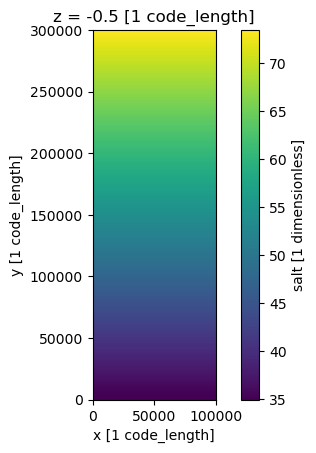

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ds['salt'].isel(ocean_time=-1, z=-1).plot(ax=ax)
ax.set_aspect(1.0)